# Análise Diagnostico de Câncer

**Objetivo desta análise**: determinar para cada caso de câncer o valor de **diagnosis** baseado nos outros atributos.

## Aquisição dos dados e pré-processamento

In [109]:
import pandas as pd
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [110]:
type(df)

pandas.core.frame.DataFrame

In [111]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [112]:
df.shape

(569, 33)

In [113]:
df = df.drop(columns=['Unnamed: 32', 'id'])

## Análise descritiva

In [114]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

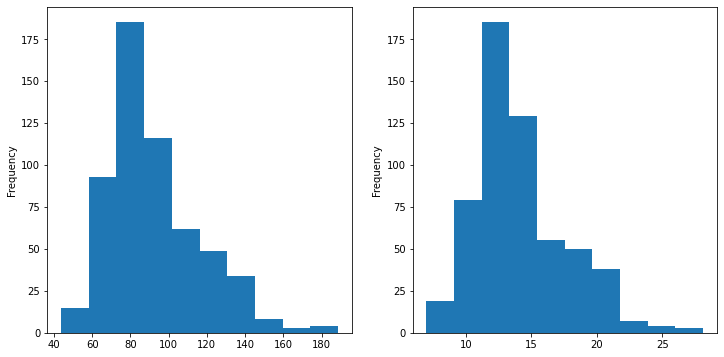

In [116]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['perimeter_mean'].plot(kind='hist', ax=axes[0])
df['radius_mean'].plot(kind='hist', ax=axes[1])

In [117]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Separando parte dos exemplos para validação final

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:9], df['diagnosis'], test_size=0.1, random_state=4)

In [119]:
X_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
345,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037
319,B,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699
72,M,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944
298,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000


In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(512, 9)
(512,)
(57, 9)
(57,)


In [121]:
y_train.value_counts()

B    316
M    196
Name: diagnosis, dtype: int64

In [122]:
y_test.value_counts()

B    41
M    16
Name: diagnosis, dtype: int64

In [123]:
cleanup_nums = {"diagnosis": 
                {"B": 1, "M": 2}
               }
X_train.replace(cleanup_nums, inplace=True)

In [124]:
X_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
345,1,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037
319,1,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699
72,2,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944
298,1,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000


In [125]:
X_train_freq = X_train.fillna(1)

In [126]:
X_train_freq.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
345,1,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037
319,1,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699
72,2,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944
298,1,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000


In [127]:
X_train_freq.shape

(512, 9)

In [128]:
from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_freq_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train_freq),
    index=X_train_freq.index,
    columns=X_train_freq.columns)

In [129]:
X_train_freq_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
345,0.0,0.155190,0.169090,0.154861,0.075546,0.416990,0.221489,0.083903,0.101243
319,0.0,0.257892,0.246534,0.240550,0.141591,0.207096,0.046500,0.031443,0.084443
72,1.0,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831
298,0.0,0.344503,0.286101,0.327759,0.207678,0.118534,0.100669,0.057990,0.068290
568,0.0,0.036869,0.501522,0.028540,0.015907,0.000000,0.074351,0.000000,0.000000


In [130]:
X_train_freq_scaled.to_csv("breast-cancer-X_train.csv")
y_train.to_csv("breast-cancer-y_train.csv")
X_test.to_csv("breast-cancer-X_test.csv")
y_test.to_csv("breast-cancer-y_test.csv")